## Case Study on Data Pre-processing



### Problem Statement:
#### Do the following on titanic dataset:

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

#### Importing Dependancies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading the dataset into python environment

In [2]:
df = pd.read_csv(r'titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 2. Make ‘PassengerId’ as the index column

In [7]:
df = df.set_index('PassengerId')

In [8]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* We have set the index using the 'PassengerId' column.

### 3. Check the basic details of the dataset

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df[df['Sex']=='female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [14]:
df[df['Sex']=='male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

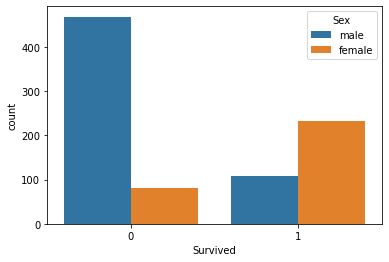

In [15]:
sns.countplot(x=df['Survived'], hue=df['Sex'])

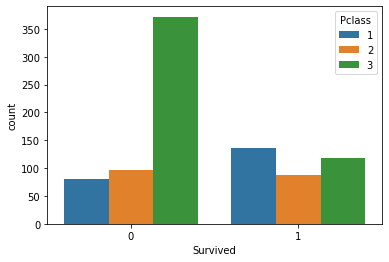

In [16]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])

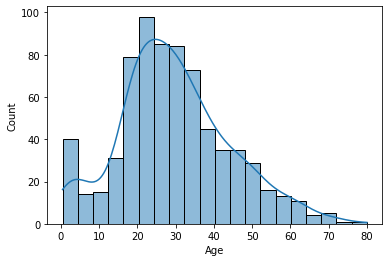

In [17]:
sns.histplot(x=df['Age'].dropna(), kde=True)
#bimodal distribution of age 

**Findings:**
* Analysing the survival status of the Titanic passengers from the data, we see that there is a major lineance towards a particular gender or passenger class.
* Out of the 342 survivors of the shipwreck, 233 of them were females. Only 81 females died.
* Out of the 577 male passengers, only 109 survived.
* A trend can be seen among the survival status based on the class of passengers (whether they are rich or middle-class).
* Most of the dead passengers belong to the 3rd class where as least passengers from the 1st class died.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

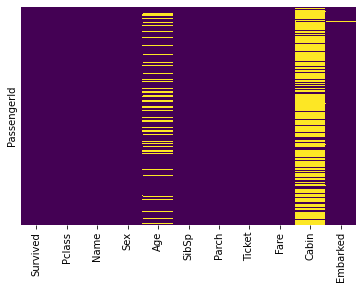

In [20]:
#heatmap for nulls
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [21]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


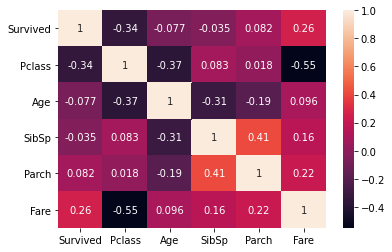

In [22]:
sns.heatmap(df.corr(),annot=True)

**Findings:**
* There is a negative correlation between survival and age
* Gender is a categorical variable and it is not shown in the heatmap. 
* However, Gender is highly correlated with survival status as females had a higher survival rate compared to men.

### 4. Fill in all the missing values present in all the columns in the dataset

In [23]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Findings:**
* We find that there are 177 NaN in Age column, 687  NaN in Cabin column and 2 NaN in Embarked column.
* Since there are lots of missing values and also, considering the Machine Learning task in hand of predicting the survival status of the passenger, the column 'Cabin' doesn't seem to provide any significance. Hence, we can drop it in a usual scenario. But however as we are handling all the missing values, we impute it as well.
* We can impute the NaN in Age column using mean values of each passenger class. 
* Similarly, we can impute and encode the Embarked values as well

In [24]:
#checking type of values in coumns
df[['Age','Cabin','Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Cabin     204 non-null    object 
 2   Embarked  889 non-null    object 
dtypes: float64(1), object(2)
memory usage: 67.8+ KB


In [25]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [26]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

**Note:**
* Age is numerical value and can be imputed using mean value
* Cabin has a three figure alphanum code entered as object
* Embarked has three values of embarkment points coded with their starting letter


#### A. Handling Missing values in Age column

In [28]:
df['Age'].mean()

29.69911764705882

In [29]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
#passengers belonging to class1
p1 = df[df['Pclass']==1]

In [31]:
#mean age for p1 class passengers 
age1 = p1['Age'].mean()

In [32]:
#passengers belonging to class2
p2 = df[df['Pclass']==2]

In [33]:
#mean age for p2 class passengers 
age2 = p2['Age'].mean()

In [34]:
#passengers belonging to class3
p3 = df[df['Pclass']==3]

In [35]:
#mean age for p3 class passengers 
age3 = p3['Age'].mean()

In [36]:
#we impute age based on mean age of passenger class using below imputer func

def age_imputer(dframe):
    '''Func to impute age in the data'''
    
    age = dframe[0]
    pclass = dframe[1]
    
    if pd.isnull(age):
        
        if pclass ==1:
            return age1
        
        elif pclass ==2:
            return age2
        
        else:
            return age3
    
    else:
        return age

In [37]:
df['Age'] = df[['Age','Pclass']].apply(age_imputer,axis=1)

In [38]:
df['Age'].isnull().sum()

0

* All NaN values from the Age column has been handled using mean replacement.

#### B. Handling Missing values in Cabin column

In [39]:
len(df['Cabin'])

891

In [40]:
df['Cabin'].isnull().sum()

687

**Findings:**
* Out of 891 records, 687 are Missing values in the Cabin column. 
* Usually, since the Cabin feature doesn't contribute to the prediction as well as it has a high number of missing values, it is advisable to drop the feature.
* However, as we are not dropping it here, it is better to assign all the missing values to a new class. Here we dont have the data available with us. Hence as a convention, we assign the missing values in cabin column with 'NA' for not available.

In [41]:
df['Cabin'] = df['Cabin'].fillna('NA')

In [42]:
df['Cabin'].isnull().sum()

0

* All the missing values has been handled gracefully.

#### C. Handling Missing values in Embarked column

In [43]:
len(df['Embarked'])

891

In [44]:
df['Embarked'].isnull().sum()

2

In [45]:
#identifying the embarked missing values
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [46]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
644/891

0.7227833894500562

In [48]:
df['Embarked'].mode()

0    S
dtype: object

In [49]:
df[df['Cabin']=='B28']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**Findings:**
* We find that both the missing values in Embarked column belong to Passenger Class 1 and belonged to the same cabin. 
* It is also found that only they belonged to the B28 cabin - hinting that they embarked from the same point.
* Hence, as a convention, we shall impute the missing values with the most frequent entry (mode) for the Embarked column.
* S (Southampton) is seen as the most occuring value in the Embarked column. It contribute a huge 72% of the records. Hence, we go ahead to impute the missing values with Southampton.

In [50]:
embark_mode = df['Embarked'].mode()

In [51]:
embark_mode[0]

'S'

In [52]:
df['Embarked'] = df['Embarked'].fillna(embark_mode[0])

In [53]:
df['Embarked'].isnull().sum()

0

In [54]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

* All the missing values has been handled for the titanic dataset.

### 5. Check and handle outliers in at least 3 columns in the dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [56]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

From the columns in the dataset, we have to the following relevant numerical columns for outliers:
1. Pclass
2. Age
3. SibSp
4. Parch
5. Fare

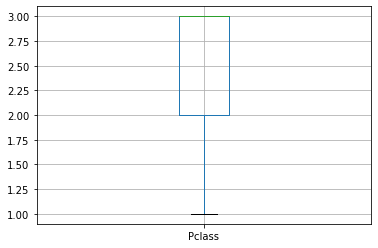

In [57]:
df.boxplot(column='Pclass')

* Doesn't have outliers (only 3 values)

#### A. Handling Outliers with Age 

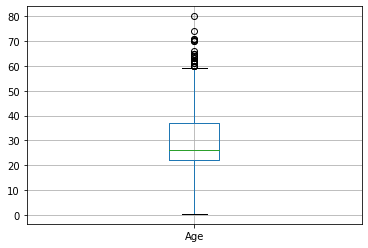

In [58]:
df.boxplot(column='Age')

In [59]:
Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
print("The Inter-Quartile Range for Age is",IQR_Age)

The Inter-Quartile Range for Age is 15.0


In [60]:
low_lim_Age = Q1_Age - 1.5 * IQR_Age
upp_lim_Age = Q3_Age + 1.5 * IQR_Age
print("Lower limit for Age is", low_lim_Age)
print("Upper limit for Age is", upp_lim_Age)
print("Beyond upper and lower limits, the values are classified as Outliers.")

Lower limit for Age is -0.5
Upper limit for Age is 59.5
Beyond upper and lower limits, the values are classified as Outliers.


In [61]:
#catching outliers from the column
outlier_Age = df[(df['Age'] < Q1_Age - 1.5*IQR_Age) | (df['Age'] > Q3_Age + 1.5*IQR_Age)]

In [62]:
outlier_Age.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NA,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NA,Q
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


In [63]:
outlier_Age['Age'].to_frame()

,Age
PassengerId,
34,66.0
55,65.0
97,71.0
117,70.5
171,61.0
253,62.0
276,63.0
281,65.0
327,61.0


In [64]:
len(outlier_Age)

26

In [65]:
#getting index positions of the outliers 
outlier_Age.index

Int64Index([ 34,  55,  97, 117, 171, 253, 276, 281, 327, 367, 439, 457, 484,
            494, 546, 556, 571, 588, 626, 631, 673, 685, 695, 746, 830, 852],
           dtype='int64', name='PassengerId')

In [66]:
df = df.drop([ 34,  55,  97, 117, 171, 253, 276, 281, 327, 367, 439, 457, 484,
            494, 546, 556, 571, 588, 626, 631, 673, 685, 695, 746, 830, 852])

In [67]:
#initial number of rows was 891
df.shape

(865, 11)

**Findings:**
* 26 Outliers have been identified in the Age column beyond the limits.
* The outlier records were dropped from the dataset.
* Number of rows reduced to 865.

#### B. Handling Outliers with Fare 

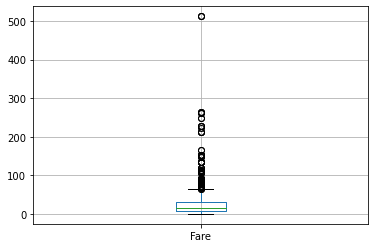

In [68]:
df.boxplot(column='Fare')

In [69]:
Q1_Fare = df['Fare'].quantile(0.25)
Q3_Fare = df['Fare'].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare
print("The Inter-Quartile Range for Fare is",IQR_Fare)

The Inter-Quartile Range for Fare is 22.6042


In [70]:
low_lim_Fare = Q1_Fare - 1.5 * IQR_Fare
upp_lim_Fare = Q3_Fare + 1.5 * IQR_Fare
print("Lower limit for Fare is", low_lim_Fare)
print("Upper limit for Fare is", upp_lim_Fare)
print("Beyond upper and lower limits, the values are classified as Outliers.")

Lower limit for Fare is -26.0105
Upper limit for Fare is 64.4063
Beyond upper and lower limits, the values are classified as Outliers.


In [71]:
#catching outliers from the column
outlier_Fare = df[(df['Fare'] < Q1_Fare - 1.5*IQR_Fare) | (df['Fare'] > Q3_Fare + 1.5*IQR_Fare)]

In [72]:
outlier_Fare.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.233441,1,0,PC 17569,146.5208,B78,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NA,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C


In [73]:
outlier_Fare['Fare'].to_frame()

,Fare
PassengerId,
2,71.2833
28,263.0000
32,146.5208
35,82.1708
53,76.7292
...,...
847,69.5500
850,89.1042
857,164.8667


In [74]:
len(outlier_Fare)

112

In [75]:
#getting index positions of the outliers 
outlier_Fare.index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            790, 793, 803, 821, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=112)

In [76]:
index_list = list(outlier_Fare.index)

In [77]:
df = df.drop(index_list)

In [78]:
#initial number of rows was 865
df.shape

(753, 11)

**Findings:**
* 112 Outliers have been identified in the Fare column beyond the limits.
* The outlier records were dropped from the dataset.
* Number of rows reduced to 753.

#### C. Handling Outliers with SibSp 

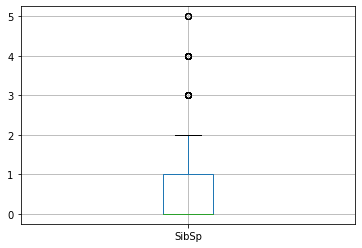

In [79]:
df.boxplot(column='SibSp')

In [80]:
df['SibSp'].min()

0

In [81]:
df['SibSp'].max()

5

In [82]:
Q1_SibSp = df['SibSp'].quantile(0.25)
Q3_SibSp = df['SibSp'].quantile(0.75)
IQR_SibSp = Q3_SibSp - Q1_SibSp
print("The Inter-Quartile Range for SibSp is",IQR_SibSp)

The Inter-Quartile Range for SibSp is 1.0


In [83]:
low_lim_SibSp = Q1_SibSp - 1.5 * IQR_SibSp
upp_lim_SibSp = Q3_SibSp + 1.5 * IQR_SibSp
print("Lower limit for SibSp is", low_lim_SibSp)
print("Upper limit for SibSp is", upp_lim_SibSp)
print("Beyond upper and lower limits, the values are classified as Outliers.")

Lower limit for SibSp is -1.5
Upper limit for SibSp is 2.5
Beyond upper and lower limits, the values are classified as Outliers.


* A person cannot have number of siblings or spouse below zero. Hence the lower limit is meaningless in this case.
* Hence we take lower limit as 0 and use 1 as the whisker width

In [84]:
low_lim_SibSp = 0
upp_lim_SibSp = Q3_SibSp + 1*IQR_SibSp
print("Lower limit for SibSp is", low_lim_SibSp)
print("Upper limit for SibSp is", upp_lim_SibSp)
print("Beyond upper and lower limits, the values are classified as Outliers.")

Lower limit for SibSp is 0
Upper limit for SibSp is 2.0
Beyond upper and lower limits, the values are classified as Outliers.


In [85]:
#catching outliers from the column
outlier_SibSp = df[(df['SibSp'] < 0) | (df['SibSp'] > Q3_SibSp + 1*IQR_SibSp)]

In [86]:
outlier_SibSp.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NA,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NA,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NA,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NA,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NA,S


In [87]:
outlier_SibSp['SibSp'].to_frame()

,SibSp
PassengerId,
8,3
17,4
25,3
51,4
60,5
64,3
69,4
72,5
86,3


In [88]:
len(outlier_SibSp)

36

In [89]:
#getting index positions of the outliers 
outlier_SibSp.index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [90]:
index_list2 = list(outlier_SibSp.index)

In [91]:
df = df.drop(index_list2)

In [92]:
#initial number of rows was 753
df.shape

(717, 11)

**Findings:**
* 36 Outliers have been identified in the SibSp column beyond the limits.
* The outlier records were dropped from the dataset.
* Number of rows reduced to 717.

#### D. Handling Outliers with Parch

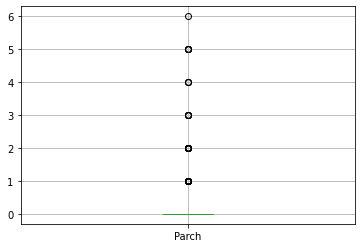

In [93]:
df.boxplot(column='Parch')

In [94]:
df['Parch'].value_counts()

0    589
1     80
2     34
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64

In [95]:
df['Parch'].min()

0

In [96]:
df['Parch'].max()

6

In [97]:
Q1_Parch = df['Parch'].quantile(0.25)
Q3_Parch = df['Parch'].quantile(0.75)
IQR_Parch = Q3_Parch - Q1_Parch
print("The Inter-Quartile Range for Parch is",IQR_Parch)

The Inter-Quartile Range for Parch is 0.0


In [98]:
Q1_Parch

0.0

In [99]:
Q3_Parch

0.0

* A person cannot have number of parents or children below zero. Hence the lower limit is set to 0.
* Since IQR is zero, Upper limit also gets set to 0.

In [100]:
low_lim_Parch = 0
upp_lim_Parch = Q3_Parch + 1*IQR_Parch
print("Lower limit for Parch is", low_lim_Parch)
print("Upper limit for Parch is", upp_lim_Parch)
print("Beyond upper and lower limits, the values are classified as Outliers.")

Lower limit for Parch is 0
Upper limit for Parch is 0.0
Beyond upper and lower limits, the values are classified as Outliers.


In [101]:
df['Parch'].value_counts()

0    589
1     80
2     34
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64

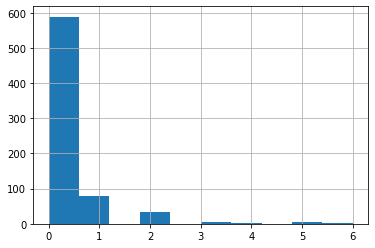

In [102]:
df['Parch'].hist()

* From the value_counts and distribution of Parch column, we see that over 95% of the data falls within value of 2 in Parch column.
* The upper limit with the IQR method doesn't seem common sensical. 
* Hence, based on the distribution of the data, we fix the upper limit as 2.

In [103]:
#catching outliers from the column
outlier_Parch = df[(df['Parch'] < 0) | (df['Parch'] > 2)]

In [104]:
outlier_Parch.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NA,S
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NA,S
87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NA,S
168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NA,S
361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NA,S


In [105]:
outlier_Parch['Parch'].to_frame()

,Parch
PassengerId,
14,5
26,5
87,3
168,4
361,4
438,3
568,4
611,5
639,5


In [106]:
len(outlier_Parch)

14

In [107]:
#getting index positions of the outliers 
outlier_Parch.index

Int64Index([14, 26, 87, 168, 361, 438, 568, 611, 639, 679, 737, 775, 859, 886], dtype='int64', name='PassengerId')

In [108]:
index_list3 = list(outlier_Parch.index)

In [109]:
df = df.drop(index_list3)

In [110]:
#initial number of rows was 717
df.shape

(703, 11)

**Findings:**
* 14 Outliers have been identified in the Parch column beyond the limits.
* The outlier records were dropped from the dataset.
* Number of rows reduced to 703.


### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [111]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* For the final modelling, we drop the columns Name, Ticket and Cabin.
* We encode the Embarked and Sex column using OneHotEncoding.
* After encoding, we also drop the object-typed Sex and Embarked COlumns.

In [112]:
Gender = pd.get_dummies(df['Sex'],drop_first=True)

In [113]:
Gender.head()

,male
PassengerId,
1,1
3,0
4,0
5,1
6,1


In [114]:
Embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [115]:
Embark.head()

,Q,S
PassengerId,,
1,0,1
3,0,1
4,0,1
5,0,1
6,1,0


In [116]:
df.drop(['Sex','Embarked','Name','Cabin','Ticket'],axis=1,inplace=True)

In [117]:
df = pd.concat([df,Gender,Embark],axis=1)

In [118]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.00000,1,0,7.2500,1,0,1
3,1,3,26.00000,0,0,7.9250,0,0,1
4,1,1,35.00000,1,0,53.1000,0,0,1
5,0,3,35.00000,0,0,8.0500,1,0,1
6,0,3,25.14062,0,0,8.4583,1,1,0


* In the new data, male represents whether a passenger is male (1) or not (0).
* Q and S represents two of the embarkment points. The third is understood if the others both are set to 0.
* With this, we can attempt to normalize our data using MinMaxScaler.

In [119]:
#importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [120]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,0.354196,2.470839,28.269014,0.268848,0.210526,16.586966,0.695590,0.096728,0.743954
std,0.478610,0.732976,10.978949,0.503814,0.513135,13.057373,0.460485,0.295798,0.436758
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.500000,0.000000,0.000000,7.877100,0.000000,0.000000,0.000000
50%,0.000000,3.000000,25.140620,0.000000,0.000000,10.500000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,34.250000,0.000000,0.000000,23.350000,1.000000,0.000000,1.000000
max,1.000000,3.000000,59.000000,2.000000,2.000000,63.358300,1.000000,1.000000,1.000000


In [122]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [123]:
scaled = scaler.fit_transform(df)
print(scaled)

[[0.         1.         0.36838511 ... 1.         0.         1.        ]
 [1.         1.         0.4366678  ... 0.         0.         1.        ]
 [1.         0.         0.59030386 ... 0.         0.         1.        ]
 ...
 [0.         1.         0.42199761 ... 0.         0.         1.        ]
 [1.         0.         0.4366678  ... 1.         0.         0.        ]
 [0.         1.         0.53909184 ... 1.         1.         0.        ]]


In [125]:
df_new = pd.DataFrame(scaled)

In [126]:
df_new.head()

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.368385,0.5,0.0,0.114429,1.0,0.0,1.0
1,1.0,1.0,0.436668,0.0,0.0,0.125082,0.0,0.0,1.0
2,1.0,0.0,0.590304,0.5,0.0,0.838091,0.0,0.0,1.0
3,0.0,1.0,0.590304,0.0,0.0,0.127055,1.0,0.0,1.0
4,0.0,1.0,0.421998,0.0,0.0,0.133499,1.0,1.0,0.0


In [127]:
#checking the summary stats
df_new.describe()

,0,1,2,3,4,5,6,7,8
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,0.354196,0.735420,0.475401,0.134424,0.105263,0.261796,0.695590,0.096728,0.743954
std,0.478610,0.366488,0.187418,0.251907,0.256568,0.206088,0.460485,0.295798,0.436758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.376920,0.000000,0.000000,0.124326,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.421998,0.000000,0.000000,0.165724,1.000000,0.000000,1.000000
75%,1.000000,1.000000,0.577501,0.000000,0.000000,0.368539,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Findings:**
* We can see that the distributions have been adjusted and that the minimum and maximum values for each variable are now a crisp 0.0 and 1.0 respectively.

#### Additional Step:
### Implementing a Logistic Regression Model on Titanic Dataset after preprocessing

#### 1. Train Test Splitting

In [129]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(0,axis=1), 
                                                    df_new[0], test_size=0.30, 
                                                    random_state=101)

#### 2. Training and Prediction

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [136]:
y_pred = model.predict(X_test)

#### 3. Evaluation

In [138]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       130
         1.0       0.75      0.70      0.73        81

    accuracy                           0.80       211
   macro avg       0.79      0.78      0.78       211
weighted avg       0.79      0.80      0.79       211



In [144]:
from sklearn.metrics import accuracy_score
print("The prediction accuracy for the Logistic Regression model is {}%".format(round(accuracy_score(y_test,y_pred),4)*100))

The prediction accuracy for the Logistic Regression model is 79.62%


**Findings:**
* The accuracy can be further improved using better approach towards preprocessing.
* Better models can also perform with better accuracy.

In [145]:
#Submitted by Sujith Narayanan
#DSA_B3 - 2021 October Batch

<h2> <center>- END OF CASE STUDY -